# First look at the data

## imports libraries

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## loads data

In [190]:
data = pd.read_csv("teacher_data/ODI-2022.csv", sep=";")

In [191]:
data.head()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


## Properties of the data
Notice all sorts of properties of the dataset: how many records are there, how many
attributes, what kinds of attributes are there, ranges of values, distribution of values,
relationships between attributes, and so on. Notice if something is interesting (to you,
or in general), make sure you write it down if you find something worth mentioning.


In [192]:
data.describe()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
count,304,304,304,304,304,304,304,304,304,304,304,304,303,304,302,304,304
unique,165,123,3,3,3,3,5,5,295,30,3,77,109,142,177,201,235
top,4-5-2022 12:16:06,AI,yes,0,mu,ja,male,neither,08-05-1998,0,no,10,100,7,23:00,Sun,Food
freq,9,39,185,202,243,158,183,105,3,126,236,22,50,19,21,14,11


In [193]:
data.shape

(304, 17)

## general observations
- 304 records
- 17 columns with features

## rename columns

In [194]:
data.columns = ["timestamp", "program", "if_ml", "if_information", "if_statistics", "if_databases", "gender",
               "chocolate", "birthday", "neighbors", "standing", "stress", "winning", "random", "sleeping",
               "good_day1", "good_day2"]

## normalize data

In [195]:
print(data['if_statistics'].unique())
data['if_statistics'][data['if_statistics']=="mu"] = 1
data['if_statistics'][data['if_statistics']=="sigma"] = 0
data['if_statistics'][data['if_statistics']=="unknown"] = None
print(data['if_statistics'].unique())

['mu' 'unknown' 'sigma']
[1 None 0]


In [196]:
print(data['if_ml'].unique())
data['if_ml'][data['if_ml']=="yes"] = 1
data['if_ml'][data['if_ml']=="no"] = 0
data['if_ml'][data['if_ml']=="unknown"] = None
print(data['if_ml'].unique())

['yes' 'no' 'unknown']
[1 0 None]


In [197]:
print(data['if_databases'].unique())
data['if_databases'][data['if_databases']=="nee"] = 0
data['if_databases'][data['if_databases']=="ja"] = 1
data['if_databases'][data['if_databases']=="unknown"] = None
print(data['if_databases'].unique())

['nee' 'ja' 'unknown']
[0 1 None]


In [198]:
print(data['standing'].unique())
data['standing'][data['standing']=="no"] = 0
data['standing'][data['standing']=="yes"] = 1
data['standing'][data['standing']=="unknown"] = None
print(data['standing'].unique())

['no' 'yes' 'unknown']
[0 1 None]


In [199]:
print(data['if_information'].unique())
data['if_information'][data['if_information']=="unknown"] = None
print(data['if_information'].unique())

['0' '1' 'unknown']
['0' '1' None]


## Missing values

In [200]:
data.isna().sum() 

timestamp          0
program            0
if_ml              7
if_information    27
if_statistics     28
if_databases       7
gender             0
chocolate          0
birthday           0
neighbors          0
standing          26
stress             0
winning            1
random             0
sleeping           2
good_day1          0
good_day2          0
dtype: int64

In [201]:
data.head()

,timestamp,program,if_ml,if_information,if_statistics,if_databases,gender,chocolate,birthday,neighbors,standing,stress,winning,random,sleeping,good_day1,good_day2
0,4-5-2022 12:12:07,artificial intelligence,1,0,1,0,female,neither,02.05.1998,0,0,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,1,0,1,0,male,fat,29-02-2000,0,1,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,1,1,1,1,male,fat,29-06-1998,1,0,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,1,0,None,0,male,neither,11/05/97,0,0,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,1,1,1,1,male,fat,03-10-1997,0,0,2,100,86,07:20,Sunshine,Good Food


## change data type

In [202]:
data['if_ml'] = data['if_ml'].apply(pd.to_numeric)
data['if_statistics'] = data['if_statistics'].apply(pd.to_numeric)
data['if_information'] = data['if_information'].apply(pd.to_numeric)
data['if_databases'] = data['if_databases'].apply(pd.to_numeric)
data['standing'] = data['standing'].apply(pd.to_numeric)

In [203]:
data.dtypes

timestamp          object
program            object
if_ml             float64
if_information    float64
if_statistics     float64
if_databases      float64
gender             object
chocolate          object
birthday           object
neighbors          object
standing          float64
stress             object
winning            object
random             object
sleeping           object
good_day1          object
good_day2          object
dtype: object

## messy data

In [204]:
data['winning'].unique()

array(['5', '1', '100', '1000', '0.1', '10', '100 / the number of people',
       '87', '1/n', '0', 'at least 10', '5€', '55',
       'The price of Febo kroketje', '99', '30', '0,5', 'A lot', '20',
       '2', '1 cent', '200', '0.60', '77', '5 euros :))', 'Billion',
       '10 cents', '100/100', '80', '50 euros', '28052', '69',
       'An appropriate amount', '3.50', '(100/627)~0.157', 'a lot',
       'I prefer not holding competitions and receiving money everone',
       '1000000', '12', '1 million euros', '50', '500', '100000',
       'You don’t owe me anything ', '100/n', '70', '24.99', '100 euros',
       '7', '25', '10eur', '66', '69,69', 'I deserve everything', '0.6',
       '0.10', '0.16', 'What?', 'IDK', '0.15', '23', '35',
       '100/#people taking the course', '88', '0,00006',
       'At least half 😎', '0,16', '6', '0.50', '60', '0.16 ', nan,
       '10 euros', '6 cents', 'equal', '40', '-',
       'If I win the the competition I feel like I deserve the total amount. Otherwi

In [205]:
data['stress'].unique()

array(['0', '200', '20', '2', '48', '100', '50', '60', '5000', '65', '70',
       'over 9000', '98', '34', '15', '1000', '10', '90', '1', '56', '69',
       '79', '33', '80', '40', '45', '7', '101', '5', '88', '75', '99',
       '30', '999', '1E+22', '42', '61', '89', 'yes.', '150', 'Over 9000',
       '44', '3', 'Next question', '14', 'yes', '68', '22', '-69', '47',
       '36', '12', '85', '55', '23', '7.5', '11', '59', '25', '37', '102',
       '29', '72', '77', '32', '81', '-100', '19', '66', '87', '45.8',
       'Fifty', '38', 'private matters', '62', '9', '666'], dtype=object)

In [206]:
data['random'].unique()

array(['888', '12', '9', '31', '86', '87', '6', '50', '42', '88', '1',
       '56', '7', '8', '420', '22', '17', '0', '800039995', '72', '27',
       '6.98', '11', '3.14', '32', '1278946', '651', '24', '2500', '-1',
       '1946', '36', '666', '765', '3', '81', '109', '4444', '94', '9999',
       '401', '19', '77', '69', '864687452', '280', '67', '2', '33',
       '8271', '4', '365', '5', '41', '73',
       '029384750928347509832475908347529803475982347598237459802374980572349805723489573298576893475983274598723498572349805738904759082345702345897349857',
       '980000000000000789', '432', '100', '10.3', '14', '3645',
       '987654321', 'Π', '227', '247', '57',
       '73553801531488322931570535984775796225797789', '94736253',
       '1947271047294720^10204847', '13', '97', '25', '567', '58', '23',
       '43', 'No', '21', '5813', '7823', '47', '76853', '7,66789E+13',
       '83', '60', 'omega', '10', '4.34', '68', '651893', '9462648',
       '521', '9664367943217790643378', '2230', 

In [207]:
data['neighbors'].unique()

array(['0', '1', '5', '-4', '11', '3', '2', '20', '666', '7', '45', '4',
       '6', 'sigma', '-2', 'a couple', '250', 'many', '300',
       'Master & Margarita', '8', '978000', 'Zero', '>600', '128',
       'Im in the web', '12', 'Quattro', 'zero', '9'], dtype=object)

In [208]:
data['good_day1'].unique()

array(['coffee', '7777', '0', 'good food', 'Sunshine', 'This lecture',
       'sunshine', 'Rainy Day', 'Food', 'sun, friends and wine', 'Coffee',
       'sun', 'drugs', 'Good sleep', 'Good mental state.', '6', 'food',
       'Having a fun lecture', 'Flat white', 'Friends', 'Happy',
       'See you smile', 'Having my favorite meal :)', 'Head',
       'A good balance between productivity and rest', 'Movies',
       'Good food', 'Sunnnn', 'alcohol', 'Datamining', 'Weather', 'Sex',
       '1', 'Working hard', 'Beer', 'good night of sleep', 'Good weather',
       'Saturday', 'Seeing Friends', 'Satisfaction', '2', 'Chocolate',
       'Yes', 'Snacks', 'With family and loved ones', 'Sun', 'Cookies',
       'Biking ', 'waking up early', 'Gym', 'whole lotta bread', '420',
       'Having a snickers ', 'Free food', 'sleep', 'alive',
       'No deadlines/exam', 'waking up ', 'Good food and sports',
       'being stoic', 'game', 'Kissing thomas', 'Joy', 'Reading', 'Cake',
       'No lectures ', 'Fro

In [209]:
data['good_day2'].unique()

array(['sun', '8964', '0', 'no stress', 'Good Food', 'Sun', 'happiness',
       'Weekend', 'Relaxation', 'relaxing, watching a show, hockey',
       'Not coffee', 'holiday', 'beer', 'Good work', 'A challenge.', '9',
       'sleeping', 'Hanging out with my friends', 'tv series',
       'good food', 'wind:(', 'Water', 'Faces', 'Monk',
       'Getting enough sleep', 'Good weather', 'A good night of sleep',
       'Coffee', 'Croissant', 'relax', 'Datamining2', 'sleep', 'Beer',
       'Good food', '1', 'Playing volleyball', 'Friends', 'Ajax',
       'Nice people around', 'Saturday', 'Nice weather', 'Spare time',
       '4', 'beach', 'Clear skies', 'No', 'gym', 'Good grades',
       'Being in good health', 'Sleep', 'More beer', "I don't know ",
       'Food', 'Books', 'finishing things for the day', 'good wave check',
       'Good coffee', '69', 'Free coffee', 'Chocolate Milk', 'eat',
       'awake', 'not rain', 'Good sex', 'eating', '10',
       'accepting change', 'beautiful girl', 'Alcoho

## Clean this mess

In [210]:
# neighbors
data['neighbors'] = pd.to_numeric(data['neighbors'], errors='coerce').astype('Int64')

In [211]:
sum(data['neighbors'].isna())

9

In [212]:
data['neighbors'][data['neighbors']<0] = 0
data['neighbors'][data['neighbors']>600] = 600

In [213]:
tmp_data = data['neighbors'].dropna()
mean = int(np.mean(tmp_data))

data['neighbors'] = data['neighbors'].fillna(mean)

In [214]:
sum(data['neighbors'].isna())

0

In [58]:
# random
data['random'].unique()

array(['888', '12', '9', '31', '86', '87', '6', '50', '42', '88', '1',
       '56', '7', '8', '420', '22', '17', '0', '800039995', '72', '27',
       '6.98', '11', '3.14', '32', '1278946', '651', '24', '2500', '-1',
       '1946', '36', '666', '765', '3', '81', '109', '4444', '94', '9999',
       '401', '19', '77', '69', '864687452', '280', '67', '2', '33',
       '8271', '4', '365', '5', '41', '73',
       '029384750928347509832475908347529803475982347598237459802374980572349805723489573298576893475983274598723498572349805738904759082345702345897349857',
       '980000000000000789', '432', '100', '10.3', '14', '3645',
       '987654321', 'Π', '227', '247', '57',
       '73553801531488322931570535984775796225797789', '94736253',
       '1947271047294720^10204847', '13', '97', '25', '567', '58', '23',
       '43', 'No', '21', '5813', '7823', '47', '76853', '7,66789E+13',
       '83', '60', 'omega', '10', '4.34', '68', '651893', '9462648',
       '521', '9664367943217790643378', '2230', 

In [29]:
# stress


In [30]:

# winning

### generalize more categorical data to find some insights

In [31]:
# maybe nlp?

In [32]:
# good day 1

In [33]:
# good day 2

## Data visualisation

Make various plots of the data. Is there something interesting worth reporting? Re-
port the figures, discuss what is in them. What meaning do those bars, lines, dots, etc.
convey? Please select essential and interesting plots for discussion, as you have limited
space for reporting your findings (see details in a later section).

In [34]:
data.head()

,timestamp,program,if_ml,if_information,if_statistics,if_databases,gender,chocolate,birthday,neighbors,standing,stress,winning,random,sleeping,good_day1,good_day2
0,4-5-2022 12:12:07,artificial intelligence,1.0,0.0,1.0,0.0,female,neither,02.05.1998,0,0.0,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,1.0,0.0,1.0,0.0,male,fat,29-02-2000,0,1.0,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,1.0,1.0,1.0,1.0,male,fat,29-06-1998,1,0.0,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,1.0,0.0,NaN,0.0,male,neither,11/05/97,0,0.0,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,1.0,1.0,1.0,1.0,male,fat,03-10-1997,0,0.0,2,100,86,07:20,Sunshine,Good Food


### chocolate

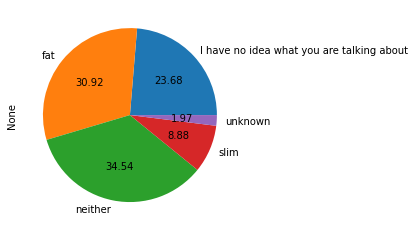

In [35]:
data.groupby('chocolate').size().plot(kind='pie', autopct='%.2f')
plt.show()

### program

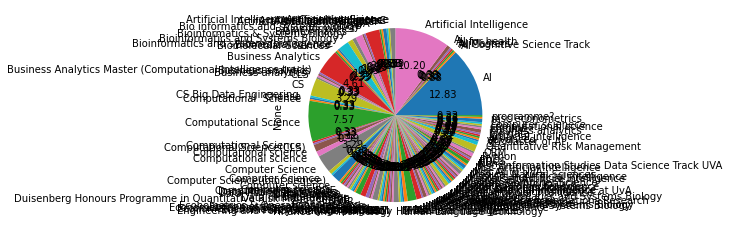

In [36]:
data.groupby('program').size().plot(kind='pie', autopct='%.2f')
plt.show()

## gender

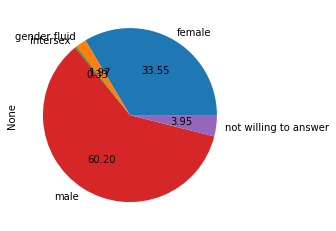

In [37]:
data.groupby('gender').size().plot(kind='pie', autopct='%.2f')
plt.show()

## if statistics

<AxesSubplot:>

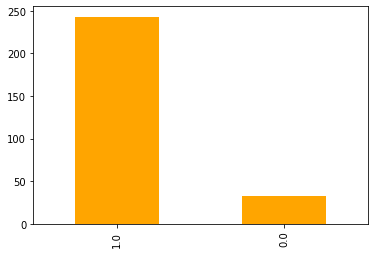

In [38]:
data['if_statistics'].value_counts().plot(kind='bar', color="orange")

## if database course

<AxesSubplot:>

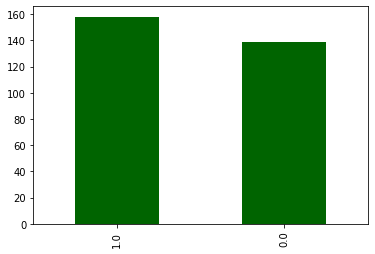

In [39]:
data['if_databases'].value_counts().plot(kind='bar', color="darkgreen")

## relationships between attributes